In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

In [49]:
len(X_train)

60000

In [50]:
len(X_test)

10000

In [51]:
X_train[0].shape

(28, 28)

In [52]:
X_train = X_train/255
X_test = X_test/255

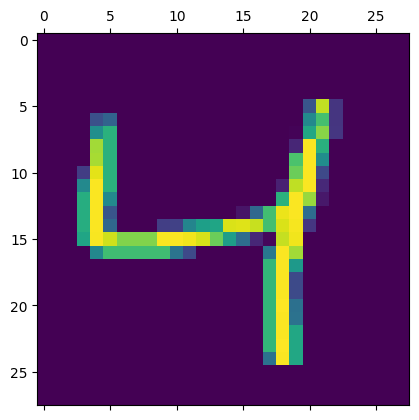

In [53]:
plt.matshow(X_train[2])

In [16]:
X_train.shape

(60000, 28, 28)

In [54]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [55]:
X_test_flattened.shape

(10000, 784)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics  = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [57]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2692 - accuracy: 0.9265


[0.2691788673400879, 0.9265000224113464]

In [58]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.6957303e-02, 4.4774757e-07, 5.2897248e-02, 9.5901227e-01,
       4.0033897e-03, 1.5026835e-01, 1.2140590e-06, 9.9976474e-01,
       9.7064570e-02, 6.9964278e-01], dtype=float32)

9

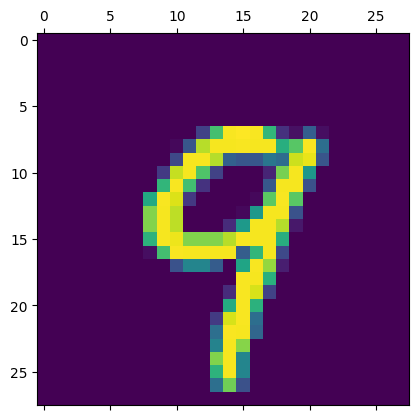

In [61]:
plt.matshow(X_test[12])
np.argmax(y_predicted[12])


In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [35]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    1,    0,    5,    7,    3,    4,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,   11,  895,   16,    9,    5,   13,   11,   61,    4],
       [   3,    0,   13,  902,    0,   36,    3,   11,   35,    7],
       [   2,    1,    2,    1,  909,    0,   11,    3,   10,   43],
       [   7,    3,    0,   18,    7,  792,   15,    4,   39,    7],
       [  11,    3,    3,    1,    7,   12,  915,    2,    4,    0],
       [   1,    5,   20,    7,    8,    0,    0,  946,    4,   37],
       [   5,    7,    4,   13,    9,   22,    8,   11,  888,    7],
       [  10,    7,    1,    8,   20,    6,    0,   17,    9,  931]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

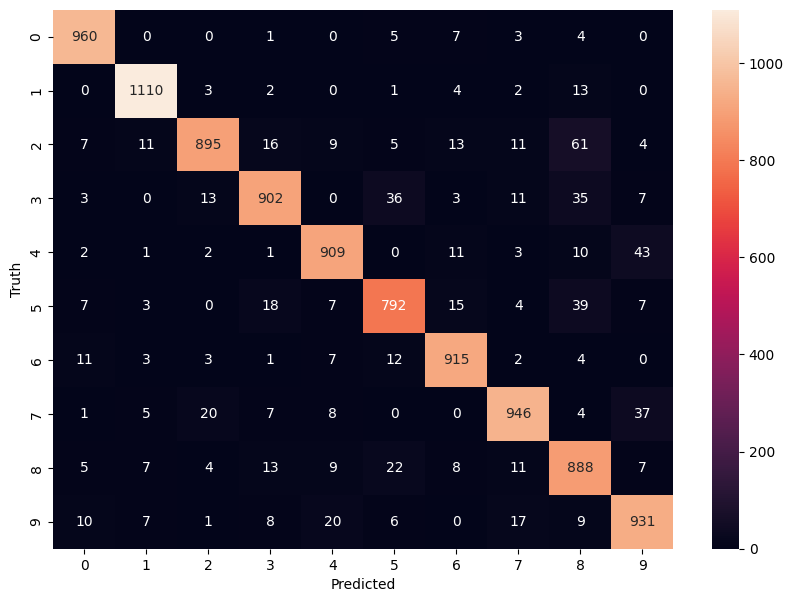

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4196 - accuracy: 0.8939
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2005 - accuracy: 0.9421
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1470 - accuracy: 0.9583
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1152 - accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0932 - accuracy: 0.9737


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9708


[0.09732522815465927, 0.97079998254776]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

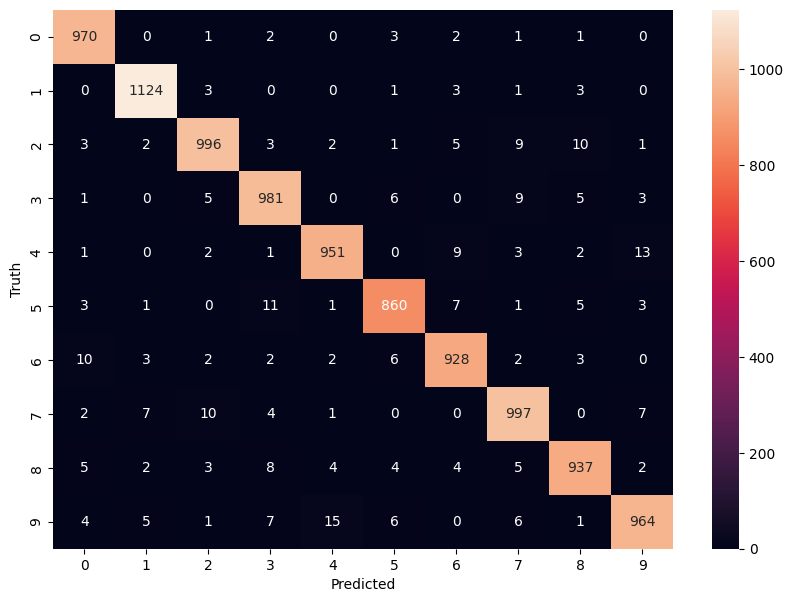

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1191 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0842 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [43]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9749


[0.08906900137662888, 0.9749000072479248]